#**Sentiment Analysis on Starbucks Reviews Dataset**
###**Data Wrangling and Exploratory Data Analysis**

### Following the leadership change at Starbucks’ in August 2024, the goal of this project is to use yelp review data dating between 2000 - 2023  to:

###1.   build a sentiment analysis model which delivers 80% accuracy for classification
###2.   determine the top 3 problems the incoming CEO can focus on in the first 12 months of his role to improve customer satisfaction.

### This notebook focuses on data wrangling and exploratory data analysis of the Yelp review data set ofr Starbucks from kaggle linked [here](https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset/data).

###It also uses financial dataset on Starbucks from the Netcials website [here](https://www.netcials.com/financial-revenue-growth-usa/829224-STARBUCKS-CORP/)

Load all the python packages needed for exploratory data analysis below

In [1]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Import file opening packages
import chardet

# Import vizualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.ticker import FixedLocator, FixedFormatter

# Import text analysis packgages
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import punkt
from nltk import punkt
from nltk import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import StanfordTagger
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Load in the yelp data and inspect the first 3 rows.

In [2]:
# Load in the yelp reviews dataset from the CSV file
reviews_df = pd.read_csv('reviews_data.csv')

# Inspect the first 3 rows of data
reviews_df.head(3)

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...


We see that includes the name of customers, the location of the reviewer, the data of the review, text for the review, rating and image lines if added in to the review. Next we inspec the information of the dataframe.

In [3]:
# Look at the descriptive information of the dataframe\
# (non-null entries, datatype, column names, number of observations)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


The dataframe includes 850 entries. All the columns except ratings have 100% fill rate. 17% of the Rating column contains missing values.

The date column is a string data type. This is converted to datatime data type and then used to create new feature columns - day of the week, month of the year, and year.

In [4]:
# Modify the date column

# Replace the word reviewed with an empty space
reviews_df['Date'] = reviews_df['Date'].\
str.replace('Reviewed', '')

# Convert the data column from object to datetime.
reviews_df['Date'] = pd.to_datetime(reviews_df['Date'],\
                                    format="mixed")

# Add columns for day of the week, month, and year.
reviews_df['Day'] = reviews_df['Date'].dt.dayofweek
reviews_df['Month'] = reviews_df['Date'].dt.month
reviews_df['Year'] = reviews_df['Date'].dt.year

# Inspect the first 3 rows of data
reviews_df.head(3)

,name,location,Date,Rating,Review,Image_Links,Day,Month,Year
0,Helen,"Wichita Falls, TX",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],2,9,2023
1,Courtney,"Apopka, FL",2023-07-16,5.0,** at the Starbucks by the fire station on 436...,['No Images'],6,7,2023
2,Daynelle,"Cranberry Twp, PA",2023-07-05,5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,2,7,2023


The location column is split on the comma to create new feature columns, City and State. The Other column is also created as a catch all for location columns that may have 2 commas.

In [5]:
# Modify the location column by splitting on the comma to separate
# into City and State
reviews_df[['City', 'State', 'Other']] = reviews_df['location'].\
str.split(',', expand = True)

# Inspect the first 3 rows of data
reviews_df.head(3)

,name,location,Date,Rating,Review,Image_Links,Day,Month,Year,City,State,Other
0,Helen,"Wichita Falls, TX",2023-09-13,5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images'],2,9,2023,Wichita Falls,TX,None
1,Courtney,"Apopka, FL",2023-07-16,5.0,** at the Starbucks by the fire station on 436...,['No Images'],6,7,2023,Apopka,FL,None
2,Daynelle,"Cranberry Twp, PA",2023-07-05,5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...,2,7,2023,Cranberry Twp,PA,None


The columns show the cities and states. The unique values of cities and states are inspected.

In [6]:
# Inspect the unique values under the 'Other' and 'State' columns
print(reviews_df['Other'].unique())
print(reviews_df['State'].unique())

[None ' Other' ' SC' ' LA']
[' TX' ' FL' ' PA' ' WA' ' OR' ' NC' ' MD' ' Other' ' CA' ' OH' ' HI'
 ' NJ' ' GA' ' DC' ' AZ' ' MA' ' VA' ' NV' ' TN' ' IA' ' WI' ' NH' ' AR'
 ' MN' ' IN' ' MO' ' IL' ' MI' ' MS' ' CO' ' Canada' ' OK' ' Ampang' ' UT'
 ' KY' ' ME' ' KS' ' ON' ' Ontario' ' BC' ' NY' ' NE' ' AK' ' AB' ' ID'
 ' OTHER' None ' LA' ' UK' ' SC' ' MB' ' SK' ' California' ' Wyoming'
 ' Virginia' ' Saskatchewan' ' South Carolina' ' NL' ' NM' ' Minnesota'
 ' Florida' ' Alberta' ' Ala' ' WV' ' Wi.' ' Maine' ' New York' ' NS'
 ' ND' ' Colorado' ' RI' ' Michigan' ' WY' ' AL' ' QC' ' MT' ' CT' ' ca'
 ' tx' ' fl' ' ma' ' NO OTHER LINE NEEDED' ' oh' ' az' ' ky' ' BECCLES'
 ' Leighton Buzzard' ' other' ' sc']


The states mostly show up as two letter acronyms. There are also some Canadian provinces included in the dataset as well as international locations like Beccles, Leighton Buzzard which are in the UK, and Ampang which is in Malaysia.

All US and Canadian states are converted to their two letter acronyms. All other entries are placed in the 'Other' category. All entries are changed to uppercase and the space is removed as well.

In [7]:
# Clean up the State entries to show acronyms and change all entries to uppercase
# For states not in US, collect under the name, 'OTHER'
reviews_df.replace(' California', 'CA', inplace = True)
reviews_df.replace(' Wyoming', 'WY', inplace = True)
reviews_df.replace(' Virginia', 'VA', inplace = True)
reviews_df.replace(' Saskatchewan', 'SK', inplace = True)
reviews_df.replace(' South Carolina', 'SC', inplace = True)
reviews_df.replace(' Minnesota', 'MN', inplace = True)
reviews_df.replace(' Florida', 'FL', inplace = True)
reviews_df.replace(' Alberta','AB', inplace = True)
reviews_df.replace(' Ala','AL', inplace = True)
reviews_df.replace(' Wi.','WI', inplace = True)
reviews_df.replace(' Maine','ME', inplace = True)
reviews_df.replace(' New York','NY', inplace = True)
reviews_df.replace(' Colorado','CO', inplace = True)
reviews_df.replace(' Michigan','MI', inplace = True)
reviews_df.replace(' Leighton Buzzard','OTHER', inplace = True)
reviews_df.replace(' NO OTHER LINE NEEDED','OTHER', inplace = True)
reviews_df.replace(' BECCLES','OTHER', inplace = True)
reviews_df.replace(' Ampang','OTHER', inplace = True)
reviews_df.replace(' Canada','ON', inplace = True)
reviews_df.replace(' Ontario','ON', inplace = True)
reviews_df['State'] = reviews_df['State'].str.replace(' ', '')
reviews_df['State'] = reviews_df['State'].str.upper()

In [8]:
# Inspect the unique values under 'State' and 'Other' again
print(reviews_df['Other'].unique())
print(reviews_df['State'].unique())

[None ' Other' ' SC' ' LA']
['TX' 'FL' 'PA' 'WA' 'OR' 'NC' 'MD' 'OTHER' 'CA' 'OH' 'HI' 'NJ' 'GA' 'DC'
 'AZ' 'MA' 'VA' 'NV' 'TN' 'IA' 'WI' 'NH' 'AR' 'MN' 'IN' 'MO' 'IL' 'MI'
 'MS' 'CO' 'ON' 'OK' 'UT' 'KY' 'ME' 'KS' 'BC' 'NY' 'NE' 'AK' 'AB' 'ID'
 None 'LA' 'UK' 'SC' 'MB' 'SK' 'WY' 'NL' 'NM' 'AL' 'WV' 'NS' 'ND' 'RI'
 'QC' 'MT' 'CT']


Inspection of the values show that every state is now a two-letter capitalized acronym or 'Other'.

Next a histogram pf the ratings by count is plotted and a pie chart by percentage.

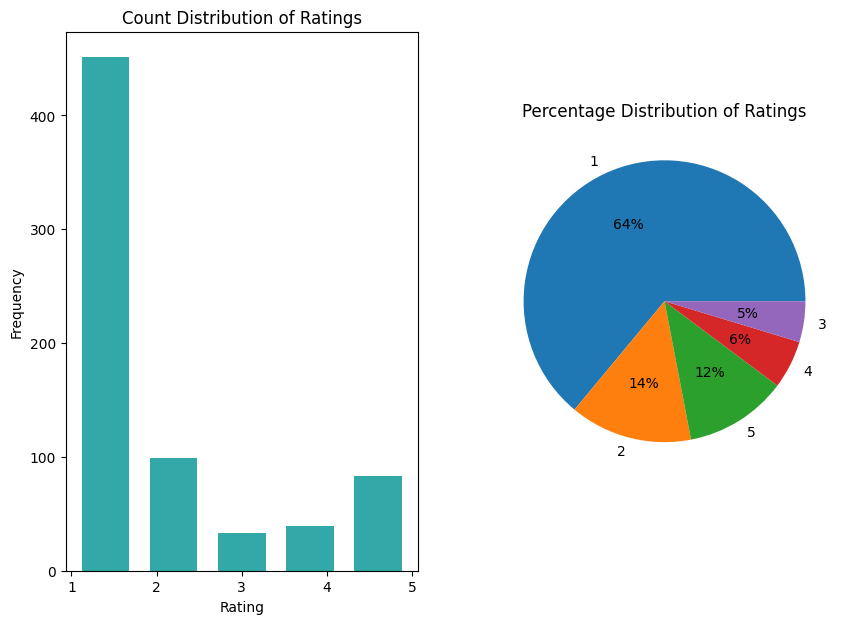

In [9]:
# Plot the histogram of ratings

# Create a pandas series called ratings
ratings = reviews_df['Rating']

# Calculate % of ratings
percent_ratings = ratings.value_counts(normalize = True) * 100
# Reformat ratings to show no decimal
percent_ratings.index = percent_ratings.index.astype(int)

# Plot the histogram of and pie chart of ratings
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10,7))
ax1.hist(ratings, bins=5, rwidth=0.7, color='#32a8a8')
ax2.pie(percent_ratings, labels = list(percent_ratings.index), autopct = '%.0f%%')

# Format histogram
# Set labels for tick marks of ratings
ax1.set_xticks(list(range(1,6)), labels = [1, 2, 3, 4, 5])
# Label x-axis, y-axis, and title
ax1.set_xlabel('Rating')
ax1.set_ylabel('Frequency')
ax1.set_title('Count Distribution of Ratings')

# Format pie chart
# Label x-axis, y-axis, and title
ax2.set_title('Percentage Distribution of Ratings')

plt.show()

The largest rating category at 64% is 1, the next largest is two and the third largest is 5. This shows that there will be a class imbalance on ratings during our modeling step. This will be handled during the preprocessing step.

Due to the low number of entries for intermediate ratings, 3 and 4, it is unlikely that good predictions will be made for these categories. It would be good to consider either only modelling the lowest and highest ratings (1, 2, and 5) or combining ratings into good (4 and 5), and bad (1 and 2).

Next the ratings counts and averages are plotted by weekday.

<ipython-input-10-2c4be856d958>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday',\
<ipython-input-10-2c4be856d958>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday',\


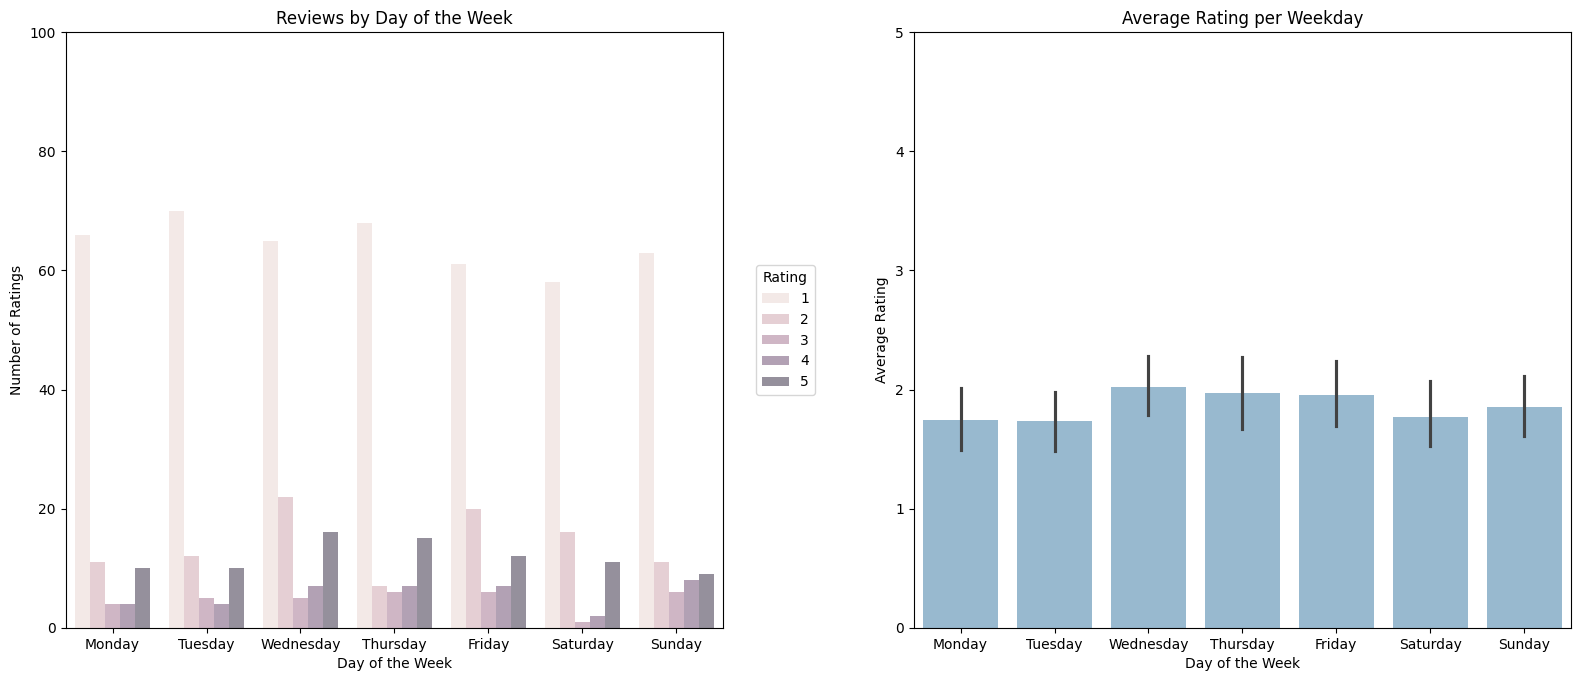

In [10]:
# Plot reviews by day of the week

# Create sns countplot, counting ratings grouped by weekday and
# categorical plot of mean ratings per weekday

# Create a subplot for the 2 plots
fig, ax = plt.subplots(1, 2, figsize=(17, 8))

# Plot rating counts by weekday
sns.countplot(
    data = reviews_df,
    x = 'Day',
    hue = 'Rating',
    alpha = 0.5,
    legend = False,
    ax = ax[0]
    )

# Calculate mean ratings per week day
mean_ratings = reviews_df.groupby('Day', as_index = False)['Rating'].mean()
# Change mean rating indices to names of days of the week
mean_ratings.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',\
                      'Friday', 'Saturday', 'Sunday']
# Plot mean rating per weekday
sns.barplot(
    #data = mean_ratings,
    data = reviews_df,
    estimator='mean',
    errorbar=('ci', 95),
    x = 'Day',
    y = 'Rating',
    alpha = 0.5,
    legend = False,
    ax = ax[1]
    )


# Set labels, location, number of columns for the legend of the count plot
ax[0].legend(title = 'Rating', labels = ['1', '2', '3', '4', '5'],
           bbox_to_anchor=(1.15, 0.5), ncol=1, loc = 'center right')

# Label the countplot's x-axis, y-axis, and title
ax[0].set_ylim(0,100)
ax[0].set_title('Reviews by Day of the Week')
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Number of Ratings')
ax[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday',\
                     'Thursday', 'Friday', 'Saturday', 'Sunday'])


# Set the x-axis, y-axis, y-limit and title for the mean barplot
ax[1].set_ylim(0,5)
ax[1].set_title('Average Rating per Weekday')
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Average Rating')
ax[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday',\
                     'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Space out the plots
fig.tight_layout(pad=5.0)

# Show the plot
plt.show()

The plots show that the highest ratings (5) are given during the middle of the week, Wednesda and Thursday while the lowest are given at the beginning of the week (Monday, Tuesday) and Saturday.

The mean ratings are plotted by month.

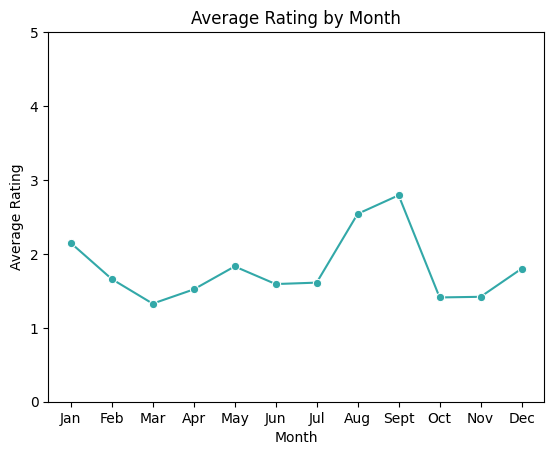

In [11]:
# Calculate the mean rating by month
month_ave_rating = reviews_df.groupby('Month')['Rating'].mean()

# Plot the average rating by month
# Label x-axis, y-axis, and title
g = sns.lineplot(data = month_ave_rating, marker = 'o', color='#32a8a8')
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')


# Set plot x-axis labels based on original labels
positions = [1, 2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

g.xaxis.set_major_locator(FixedLocator(positions))
g.xaxis.set_major_formatter(FixedFormatter(labels))
plt.ylim (0, 5)
plt.show()

On average, the ratings are higher in August and September. These months are when Starbucks introduces their fall menu. The populatiry of fall-flavored drinks and the fall menu is well-known in the United States. Some Starbucks loyal customers are known to be fond of the Pumpkin Spiced Latte and go in to purchase it when it comes on the menu.

The start of the fall season is also associated with cozy weather and the kickoff of the holiday season which might lend to customers' more optimistic outlook and higher ratings.

One way to check the hypothesis above is to look at Starbucks' revenue for each quarter of the year and see if there are positive patterns in sales during the back end of the year.

To do this, import the Starbucks revenue dataset and plot revenue per quarter.

In [12]:
# Read in Starbucks revenue csv from https://www.netcials.com/financial-revenue-growth-usa/829224-STARBUCKS-CORP/
revenue = pd.read_csv('Netcials_Starbucks_Revenue.csv')
revenue.head(2)

,Quarter-Year,Revenues (Million USD)
0,Q3-2009,2403.9
1,Q1-2010,2722.7


In [13]:
# Split the Quarter-Year column on the '-' to create new feature columns, year and quarter.
revenue['Quarter'] = revenue['Quarter-Year'].str.split('-').str[0]
revenue['Year'] = revenue['Quarter-Year'].str.split('-').str[1]
revenue.head(2)

,Quarter-Year,Revenues (Million USD),Quarter,Year
0,Q3-2009,2403.9,Q3,2009
1,Q1-2010,2722.7,Q1,2010


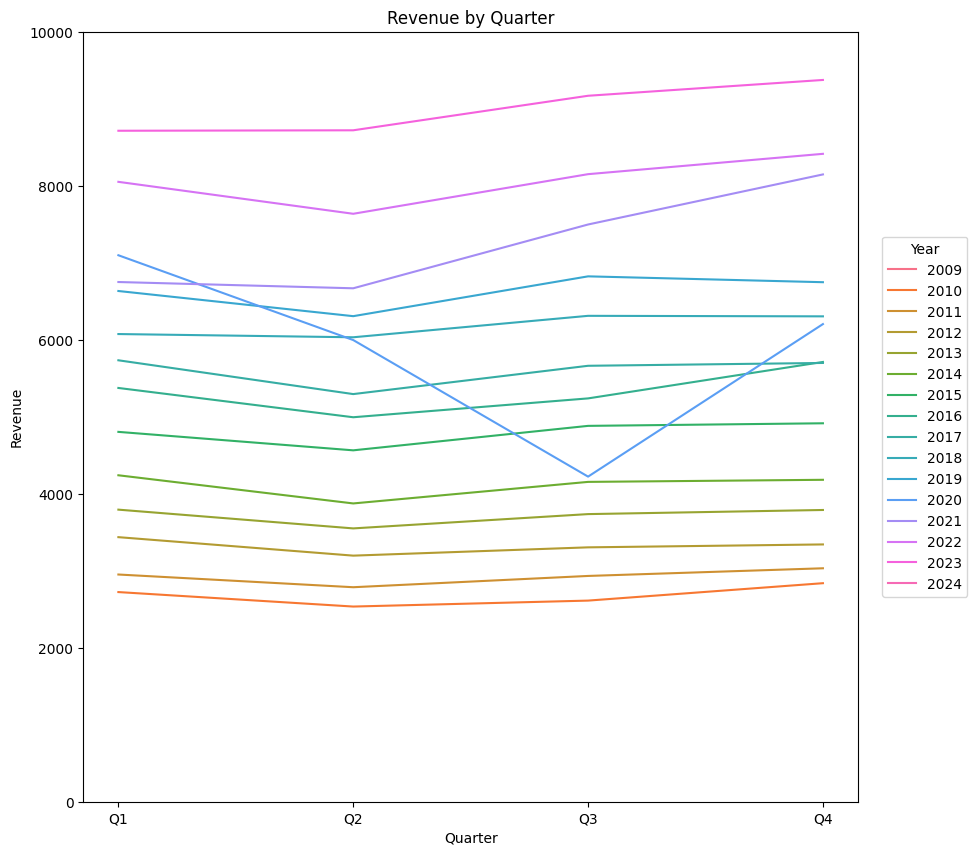

In [14]:
# Order the dataframe by the categorical variable, quarter before
# line plotting to keep the order of quarters as Q1, Q2, Q3, and Q4.
revenue['Quarter'] = pd.Categorical(revenue['Quarter'],
                                   categories=['Q1', 'Q2', 'Q3', 'Q4'],
                                   ordered=True)

# Create a lineplot of revenue by quarter and year,
# with each line represneting a year.
fig, ax = plt.subplots(figsize=(10, 10))
g = sns.lineplot(data = revenue, x = 'Quarter',\
                 y = 'Revenues (Million USD)', hue = 'Year')

# Set plot title, y-axis label, x-axis label, legend, y-limits and title.
plt.title('Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Revenue')
plt.ylim (0, 10000)
ax.legend(title = 'Year', bbox_to_anchor=(1.15, 0.5), ncol=1, loc = 'center right')
plt.show()

We see that generally, there is a rise in sales starting in Q3 (July through September) and extending through Q4 (October through December). Q4 is coincides with the run of year-end holidays. This trend is even more exaggerated when looking at the post-COVID years (2021 through 2024).

Next, the average rating is plotted by year.

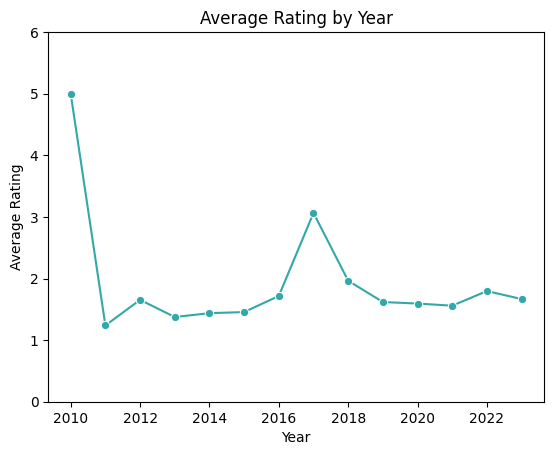

In [15]:
# Calculate average rating per year
year_ave_rating = reviews_df.groupby('Year')['Rating'].mean()

# Plot average rating per year
g = sns.lineplot(data = year_ave_rating, marker = 'o', color='#32a8a8')

# Set x-axis label, y-axis label, y-limit and title.
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.ylim (0, 6)
plt.show()

The average ratings have stayed generally level from 2010 through 2023. The rating in 2019 is a perfect 5. Isolate the reviews given in 2019 to understand why it was high.

In [16]:
# Inspect why rating in year 2010 is a perfect 5 by filtering reviews from 2009.
reviews_df[(reviews_df['Year'] == 2010) & (reviews_df['Rating'] == 5.0)]

,name,location,Date,Rating,Review,Image_Links,Day,Month,Year,City,State,Other
749,Kenneth,"Beecher, IL",2010-02-06,5.0,I found the coffee at Starbucks overrated and ...,['No Images'],5,2,2010,Beecher,IL,None


There is only one rating at that was captured in 2009 and it was a 5 which is why the rating was so high. It is interesting to note that the review was not very positive; the customer called the coffee 'overrated but still gave a high review.

The highest average rating aside from 2009 was 2017. Again, isolated the reviews from 2017 to see if the average rating makes sense.

In [17]:
# Filter reviews from 2017
reviews_df.loc[reviews_df['Year'] == 2017]

,name,location,Date,Rating,Review,Image_Links,Day,Month,Year,City,State,Other
269,Gina,"Buffalo, Wyoming",2017-12-31,5.0,It was a good introduction to the world of cof...,['No Images'],6,12,2017,Buffalo,WY,None
270,Kathryn,"Fair Oaks, CA",2017-12-30,5.0,"The coffee drinks are the best in this area, t...",['No Images'],5,12,2017,Fair Oaks,CA,None
271,Janice,"Fresno, CA",2017-12-29,4.0,"I like Starbucks. Their restaurants are clean,...",['No Images'],4,12,2017,Fresno,CA,None
272,natesha,"Roanoke, VA",2017-12-28,4.0,"Expensive but good drink, I like the food but ...",['No Images'],3,12,2017,Roanoke,VA,None
273,Bridget,"Chesapeake, Virginia",2017-12-27,4.0,I feel that they have more breakfast items tha...,['No Images'],2,12,2017,Chesapeake,VA,None
...,...,...,...,...,...,...,...,...,...,...,...,...
388,CHRISTIE,"Panorama, CA",2017-02-23,1.0,I along with my child went into Starbucks at 1...,['No Images'],3,2,2017,Panorama,CA,None
389,Laurie,"Oakland, CA",2017-01-27,1.0,Alexis in the Starbucks is so rude every time ...,['No Images'],4,1,2017,Oakland,CA,None
390,Valeriy,"Bellevue, WA",2017-01-19,1.0,Ordered an iced latte and got a hot latte pour...,['No Images'],3,1,2017,Bellevue,WA,None
391,Wendy,"Tacoma, WA",2017-01-18,1.0,I spent 29.95+tax on a simple thermal cup - Va...,['No Images'],2,1,2017,Tacoma,WA,None


2017 had 124 reviews and there is a broad spectrum of ratings which makes the average rating for the year seem legitimate. Digging into [events](https://stories.starbucks.com/stories/2017/starbucks-photos-of-the-year-2017/) that happend in Starbucks in 2017, there were no noteable reasons why the review was higher this year. There was a change in leadership and opening of a second roastery but it is not clear how these two events would directly impact customer ratings immediately.

Next the average rating per state was plotted.

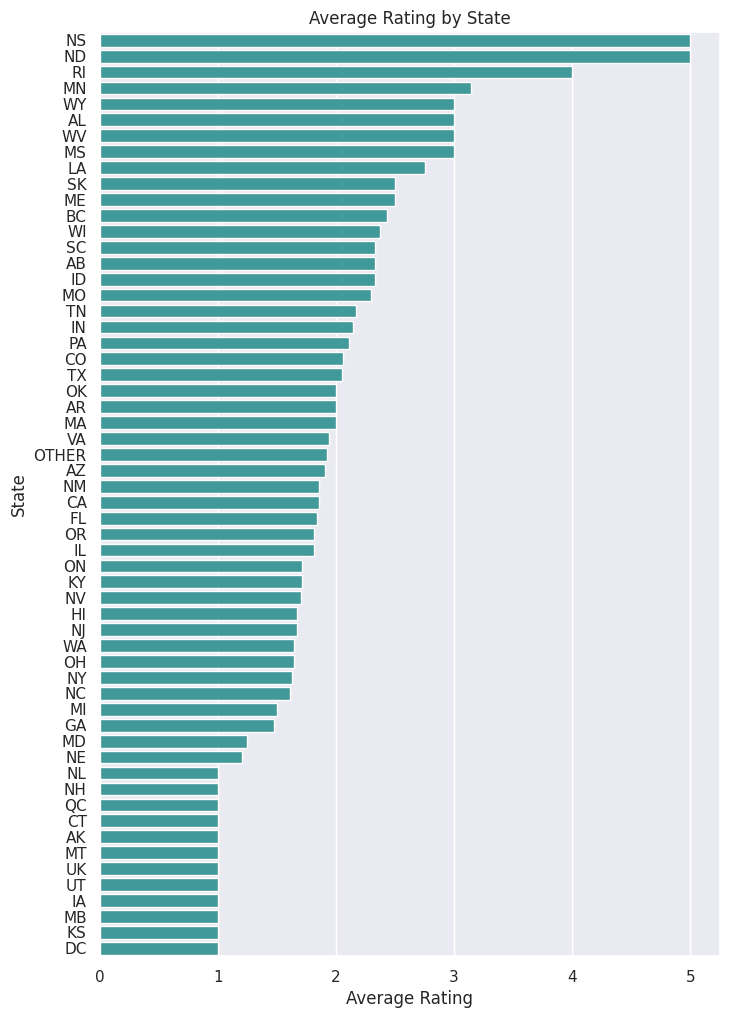

In [18]:
# Calculate average rating by state
state_ave_rating = reviews_df.groupby('State')['Rating'].mean()
sns.set(rc={"figure.figsize":(8, 12)})

# Plot average rating by state
sns.barplot(data = pd.DataFrame(state_ave_rating, index = None).\
                      sort_values(by = 'Rating', ascending = False),\
                      x = 'Rating', y = 'State', color='#32a8a8')

# Label x-axis, y-axis, and title
plt.title('Average Rating by State')
plt.xlabel('Average Rating')
plt.ylabel('State')
plt.show()

Nova Scotia and North Dakota had the highest rating of 5. However these might be due to only having a few reviews from both states. This seems to be a reasonable assumption as both states have a lower population.

The number of None entries in the table were counted.

In [19]:
# Count the number of Nan entries in the entire dataframe
reviews_df.isna().sum()

,0
name,0
location,0
Date,0
Rating,145
Review,0
Image_Links,0
Day,0
Month,0
Year,0
City,0


As seen before, the rating column had 17% of its entries empty while almost all the entries in the 'Other' column are empty. The Other column can be dropped later on.

Filter the reviews dataframe on the rating observations which are null.

In [20]:
# Check if null values still have text entries
reviews_df[reviews_df['Rating'].isnull()]

,name,location,Date,Rating,Review,Image_Links,Day,Month,Year,City,State,Other
704,James,"Kansas City, MO",2011-07-25,NaN,I just wanted to amend my email the I sent to ...,['No Images'],0,7,2011,Kansas City,MO,None
705,James,"Kansas City, MO",2011-07-25,NaN,"Recently, I have gone to your Starbucks at Bar...",['No Images'],0,7,2011,Kansas City,MO,None
706,Mike,"Revere, ma",2011-06-26,NaN,Upon my first visit to this location on my way...,['No Images'],6,6,2011,Revere,MA,None
707,Hughes,"Macclesfield, Other",2011-01-13,NaN,"Recently, British Royal Marines in Iraq wrote ...",['No Images'],3,1,2011,Macclesfield,OTHER,None
708,Sherrilynn,"Jenison, MI",2011-01-04,NaN,"On the way to catch our plane, we got a medium...",['No Images'],1,1,2011,Jenison,MI,None
...,...,...,...,...,...,...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA",2006-07-13,NaN,I ordered two venti frappacino's without whipp...,['No Images'],3,7,2006,Agoura Hills,CA,None
846,Bob,"Goodrich, MI",2005-01-03,NaN,No Review Text,['No Images'],0,1,2005,Goodrich,MI,None
847,Erik,"Valley Village, CA",2004-11-05,NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images'],4,11,2004,Valley Village,CA,None
848,Andrew,"Fallbrook, CA",2004-10-20,NaN,No Review Text,['No Images'],2,10,2004,Fallbrook,CA,None


Rating observations which are null still have some text in the review column. This text will be useful for general EDA. However, there are null rating observations which also have no text in the review columns; they are filled as 'No Review Text'. These will be excluded from modelling later on.

Create a new column text_df that only includes reviews that have text for EDA. Replace null entries for ratings in text_df with 'Rating not given'.

In [21]:
# Create text_df filtering only observations with review text
text_df = reviews_df[reviews_df['Review'] != 'No Review Text']

# Fill null rating values in text_df with 'Rating not given'
text_df.loc[:,'Rating'] = text_df['Rating'].fillna('Rating not given')

Create a function that cleans dataframes by removing stopwords, tokenizing, and removing punctuation. Then create a function that creates parts of speech for sentences for each rating. Lemmatize the words that have been tagged for parts of speech and create a word cloud for each rating.

In [22]:
# Create a function that cleans the dataframes and takes
# datadrame (df), text column (text_col) and additional stop words (add_words)
# as input
def clean_text(df, text_col, add_words):
  # Create a set of stop words
  stop_words = set(stopwords.words('english'))

  # Add custom stop words to the set of stop words
  stop_words.update(add_words)

  # Change word case to lower
  df.loc[:, text_col] = df[text_col].str.lower()

  # Create tokens from the text column strings
  df.loc[:, text_col] = \
  df.apply(lambda row:word_tokenize(row[text_col]), axis = 1 )

  # Remove stopwords
  df.loc[:,text_col] =\
   df.apply\
    (lambda row:' '.\
     join([word for word in row[text_col] if word not in stop_words]), axis = 1)

  # Remove punctuation
  df.loc[:, text_col] = \
  df.apply\
   (lambda row: re.findall(r'(?:^|(?<= ))[a-zA-Z0-9]+(?= |$)',\
                           str(row[text_col])), axis = 1)
# Return the cleaned dataframe
  return df

Run clean_text function on text_df using 'Review' as the text column.

In [23]:
# Create a list of additional stop_words call more_words
add_words = ['starbucks', 'starbuck', 'coffee', 'drink', 'store', 'macchiato',\
              'coffee', 'tea', 'latte', 'venti', 'grande', 'tall']
# Select 'Review' as the text column to clean
text_col = 'Review'

# Set text_df as df
df = text_df

# Call clean_text function on these above input
clean_df = clean_text(df = df, text_col = text_col, add_words = add_words)

Create a function pos which performs part-of-speech tagging on a dataframe. The output of the script is a new dataframe the countains two columns: the ratings, and the results of parts of speech tagging for all sentences that have were associated with the specific rating.

In [24]:
# Define function pos that takes
# - a dataframe - df,
# - a list of parts of # speech which that should **not be included in POS** -
# pos_list
# -  list of ratings to generation sentence pos' for - ratings
# as input and outputs a dataframe of ratings and pos tagged sentences.
def pos(df, pos_list, ratings):
  # Create an empty dataframe
  df_pos = pd.DataFrame()

  # Loop through each rating
  for i in range(len(ratings)):
    # Select the rating for current loop
    rat = ratings[i]
    # Filter on the rating to create a dataframe with information for that
    # rating only
    rating_df = df[df['Rating'] == rat]

    # Join all the words in each row
    corpus = rating_df.apply(lambda row: ' '.\
                             join(word for word in row['Review']), axis = 1)
    # join all the rows together to create a 'bag of words
    rating_bow = ' '.join(row for row in corpus)

    #Tag each word with it's part of speech
    rating_pos = nltk.pos_tag(word_tokenize(rating_bow), tagset = 'universal')

    # Create an empty list called sent_pos to store the POS and word for all
    # all words on the bag of words
    sent_pos = []

    # Loop through each tuple in rating_pos
    for item in rating_pos:
      # Select the word and store as tok
      tok = item[0]
      # Select the part of speech and store as pos
      pos = item[1]
      #If a part of speech is not in the pos_list, create a tuple
      if pos not in pos_list:
        item_tuple = (tok, pos)
        # Append each pos and word tuple to sent_pos
        sent_pos.append(item_tuple)
    # Create a temporary dataframe from a dictionary of the current rating and
    # sentence pos for that rating
    temp_df = pd.DataFrame({'Rating': [rat], 'POS': [sent_pos]})
    # Concatenate the temporary datafram with df_pos
    df_pos = pd.concat([df_pos, temp_df], axis = 0)

  # Output the final dataframe of ratings and sentences tagged for partso f speech
  return df_pos

In [25]:
#  Set df as clean_df
df = clean_df

# Set ratings as the unique values from the ratings column of text_df
ratings = text_df['Rating'].unique()

# Set pos_list as including numerical and punctuation parts of speech
pos_list = ['NUM', '.']

# Run pos function on the above inputs
df_pos = pos(df = df, pos_list = pos_list, ratings = ratings)

# Set the index for df_pos to be series 0 to 5.
df_pos = df_pos.set_index([pd.Index(range(len(ratings)))])


In [26]:
# Inspect df_pos
df_pos.head(2)

,Rating,POS
0,5.0,"[(amber, VERB), (ladonna, ADJ), (southwest, AD..."
1,1.0,"[(correct, ADJ), (order, NOUN), (times, NOUN),..."


In [27]:
# Create function lemma which takes a dataframe df
# as its input and lemmatizes words based on its
# part of speech.

# Define lemma
def lemma(df):
  # Create an empty list of list
  # of lemmas
  lemmas_list = []
  # Loop through each list in the POS
  # column of the dataframe
  for lst in df['POS']:
    # Create an empty list called lemmas
    lemmas = []
    # Loop through each item/tuple in the list
    for item in lst:
      # Store the token and pos from the item
      # as word and pos
      word, pos = item[0], item[1]
      # If the pos is a certain part of speech
      # label it as n, v, a, r, or s
      if pos == 'NOUN':
        part_of_speech = 'n'
      elif pos == 'VERB':
        part_of_speech = 'v'
      elif pos == 'ADJ':
        part_of_speech = 'a'
      elif pos == 'ADV':
        part_of_speech = 'r'
      else:
        part_of_speech = 's'
      # Initialize the lemmatizer
      wnl = WordNetLemmatizer()
      # Lemmatize the word based on the part of speech identified
      lemma = wnl.lemmatize(word, pos = part_of_speech)
      # Append the lemma to the list of lemmas
      lemmas.append(lemma)
    # Append the list of lemmas to the list of
    # list of lemmas
    lemmas_list.append(lemmas)

  # Create a temporary dataframe from the list of
  # list of lemmas
  temp_df = pd.DataFrame({'Lemmas': lemmas_list})

  # Concatenate the temporary dataframe with the
  # original dataframe used as an input
  df = pd.concat([df, temp_df], axis = 1)

  # return the new dataframe
  return df

In [28]:
# Run lemma function on df_pos
df_lemma = lemma(df_pos)

# Join all the remma together for each row
df_lemma['Lemmas'] = df_lemma['Lemmas'].apply(lambda x: ' '\
                                              .join(word for word in x))

# Inspect the first two rows of df_lemma
df_lemma.head(2)

,Rating,POS,Lemmas
0,5.0,"[(amber, VERB), (ladonna, ADJ), (southwest, AD...",amber ladonna southwest parkway always warm we...
1,1.0,"[(correct, ADJ), (order, NOUN), (times, NOUN),...",correct order time never get right manager com...


Create the word clouds for each row of df_lemma using the lemmas column as the input for the wordcloud.

In [29]:
# Creat wordclouds uusing a dataframe, list of ratings and lemma column as inputs.
# Cycle through each rating, create a dataframe of the lemmas for each rating and plot it
def create_wordcloud(df, ratings, lemma_col):
    for item in ratings:
        dframe = df[df['Rating'] == item]
        text = ' '.join(lemma for lemma in dframe[lemma_col]) # Create text for each rating
        wordcloud = \
        WordCloud(background_color = 'white',\
                  max_words = 200, collocations
                  = True, collocation_threshold = 5)\
                  .generate(text) # Create and generate a word cloud image
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.title(item)
        plt.show()

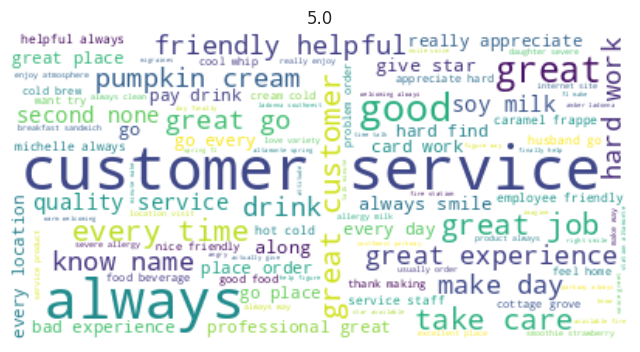

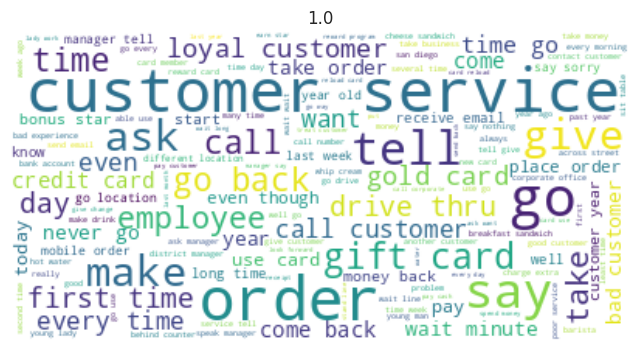

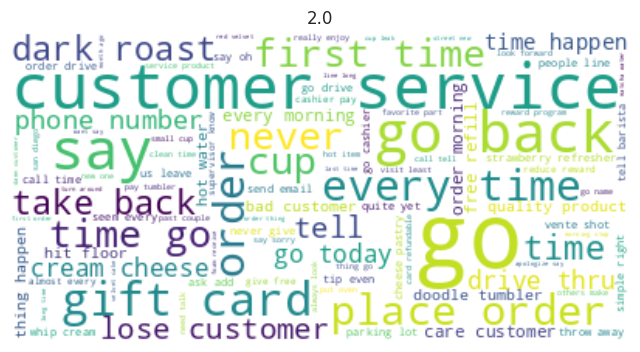

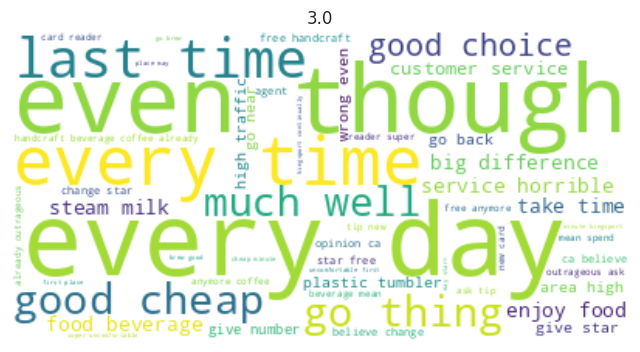

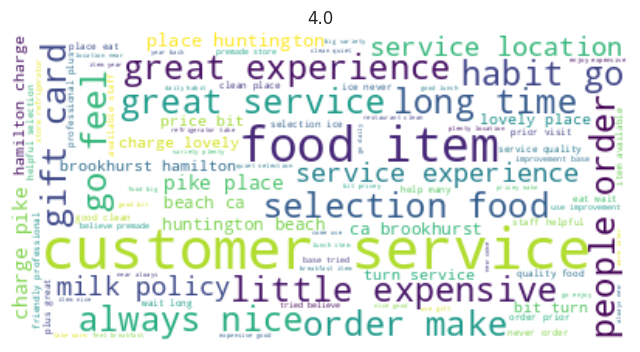

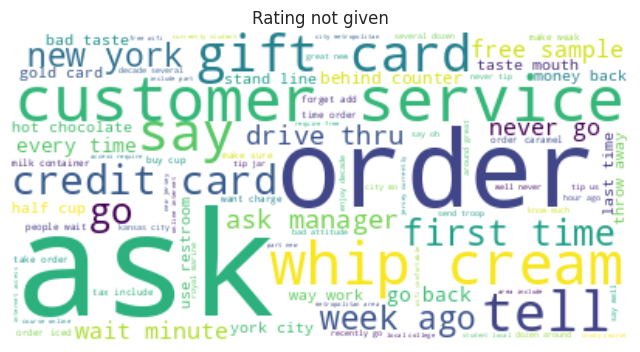

In [30]:
create_wordcloud(df_lemma, ratings, 'Lemmas')

For good ratings(4 and 5) customers comment on customer service,employee friendliness, hardwork, helpfulness and professionalist.

For the bad ratings(1 and 2), customers commented on customer service (probably bad) and waiting a long time in line. There are also phrases on product quality and taking back orders which might imply baristas are making erroneous drinks.

These phrases point to themes of what might be going right and wrong at certain locations; they can be used for future analysis.

Next, clean the dataframe for next step in analysis.

In [31]:
# Count the number of unique entries in the
# City and name columns.
print('Number of cities: ', len(reviews_df.City.unique()))
print('Number of names: ', len(reviews_df.name.unique()))

Number of cities:  597
Number of names:  604


Based on the large variety of entries it could be difficult to use cities or names for modelling. The state column would be a better feautre to use in place of city names as it aggregates information over a larger geograhic area but still has some unique information.

In a future analysis, it might be interesting to convert the name column to a higher level feature like 'gender'. It could be that specific genders focus on a different kind of feedback on reviews which might help with making model predictions.

The dataframe to be used for model preprocessing will drop the name, location, date, city, image_links and other columns.

In [32]:
# Drop name, location, date, cities. Other and Image_Links column from reviews df
# to create the dataframe to be used for the preprocessing step (df_eda)
df_eda = reviews_df.drop(columns = ['name', 'location', 'Date', 'City', 'Image_Links', 'Other'])

In [33]:
# Drop null values from the dataframe
df_eda = df_eda.dropna()
# Remove observations where there is no review step
df_eda = df_eda[df_eda['Review'] != 'No Review Text']
# Examine the information of the dataframe
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701 entries, 0 to 749
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  701 non-null    float64
 1   Review  701 non-null    object 
 2   Day     701 non-null    int32  
 3   Month   701 non-null    int32  
 4   Year    701 non-null    int32  
 5   State   701 non-null    object 
dtypes: float64(1), int32(3), object(2)
memory usage: 30.1+ KB


In [34]:
# Save the dataframe for pre-processing as a csv file
df_eda.to_csv('capstone_3_df_eda.csv')


This exploratory data analysis found that majority of reviews in the dataset (>60%) have a rating of 1. This creates a class imbalance in the dataset and should be accounted for during modelling.

Highest average reviews were observed in the middle of the week. Also, highest reviews during a year were found to be during September and October, and is thought to be associated with customer sentiment towards the start of the fall menu and holiday season.

Ratings were especially high in 2017 and further work should be done to understand why 2017 saw more positive customer reviews. This could provide clues as to what Starbucks could focus on to improve customer sentiment.

Starbucks revenues have increased from year to year, and a larger acceleration of sales from Q2 to Q3 has been since 2020. However, between 2022 and 2023 the jump in sales from Q2 to Q3 remained unchanged.

Customers who gave high ratings focused feedback on good custoemr servies, friendliness and helpfuless of baristas. On the other hand, customers who gave low ratings focused on long wait times, bad customer servies and potentially incorrect orders. These are areas Starbucks can improve on to improve sentiment.

Next step of analysis will process df_eda for modelling step.

